In [95]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier

In [97]:
# Load dataset
df = load_breast_cancer()
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names

In [99]:
# Basic information
print(dataset.head())
print("Dataset shape:", dataset.shape)
print("Dataset description:\n", dataset.describe())
print("Class distribution:\n", pd.Series(df.target).value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

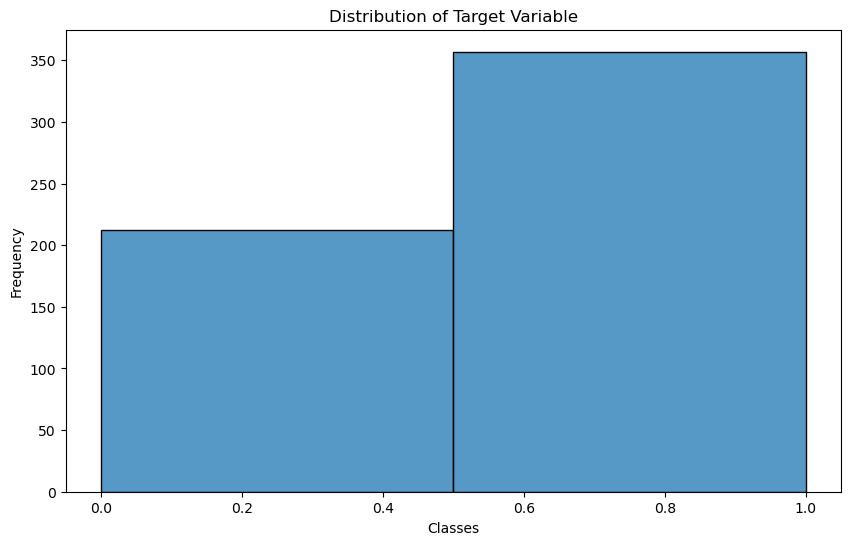

In [101]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(df.target, kde=False, bins=2)
plt.title("Distribution of Target Variable")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()

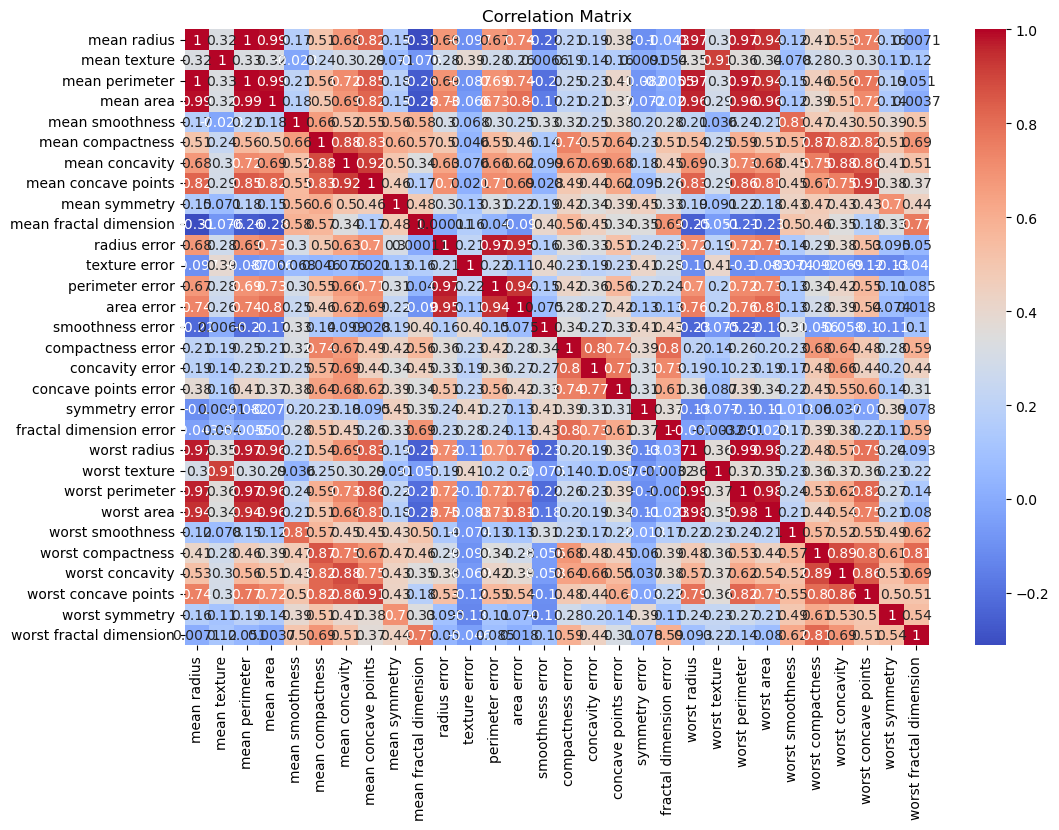

In [103]:
# Correlation matrix
corr_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [104]:
# Split dataset into training and testing sets
X = dataset
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [107]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Cross-validation scores: [0.975      0.975      1.         0.96202532 0.96202532]
Mean cross-validation score: 0.9748101265822784
Mean Squared Error: 0.017543859649122806
R2 Score: 0.9246031746031746


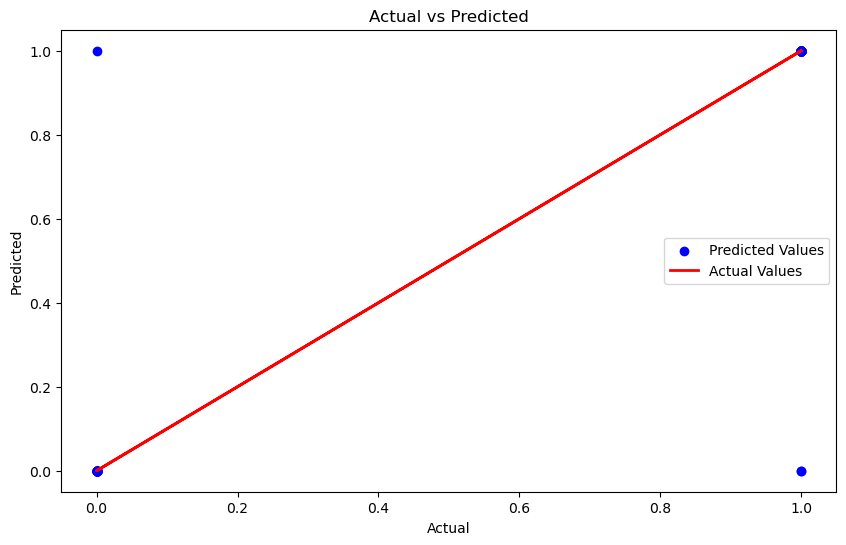

Confusion Matrix:
 [[ 62   1]
 [  2 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



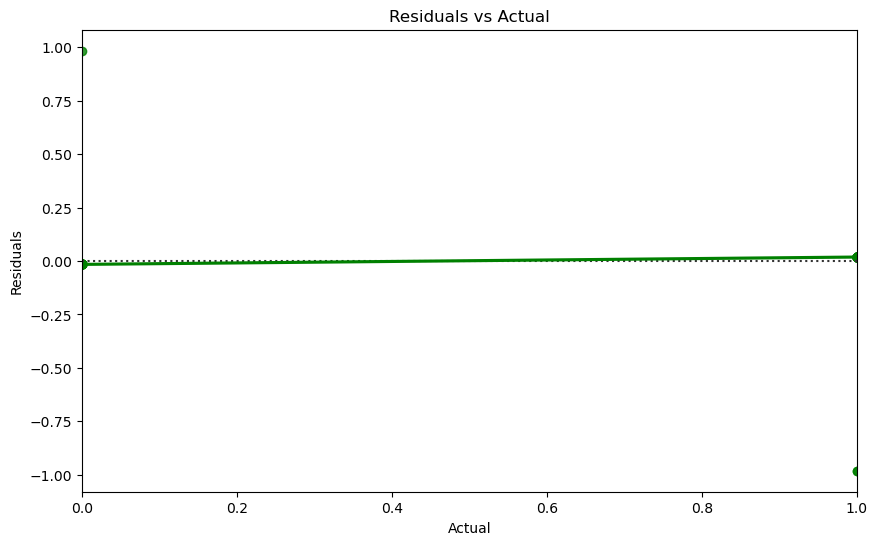

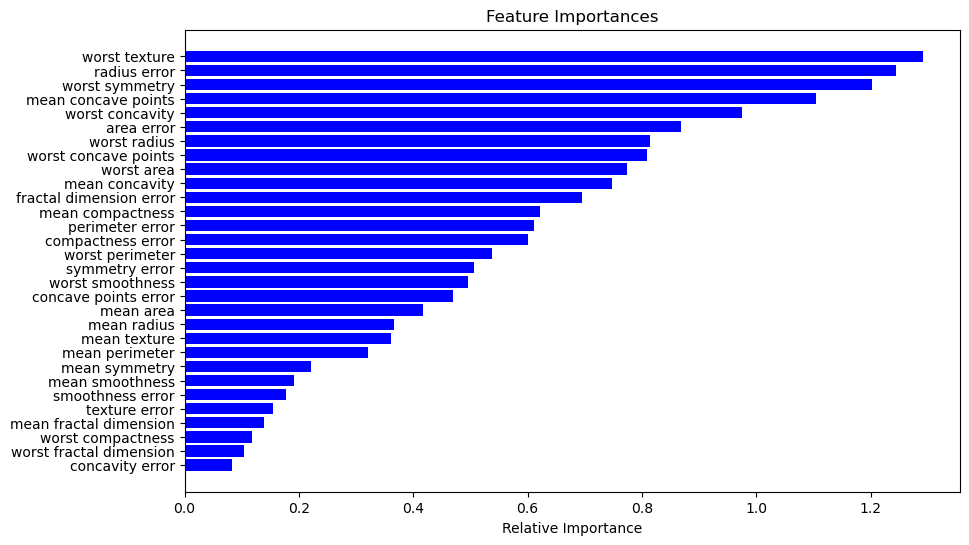

In [109]:
# Logistic Regression
regression = LogisticRegression(max_iter=1000)
regression.fit(X_train, y_train)
cv_scores = cross_val_score(regression, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
y_pred = regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Actual Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
y_pred_class = [1 if pred > 0.5 else 0 for pred in y_pred]
cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)
report = classification_report(y_test, y_pred_class)
print("Classification Report:\n", report)
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='green')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual')
plt.show()
importances = np.abs(regression.coef_[0])
feature_names = dataset.columns
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [111]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict
y_pred_rf = rf_clf.predict(X_test)

# Print Evaluation Metrics
print("Random Forest Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier:
Confusion Matrix:
 [[ 59   4]
 [  1 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



Bagging Classifier:
Confusion Matrix:
 [[ 62   1]
 [  2 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



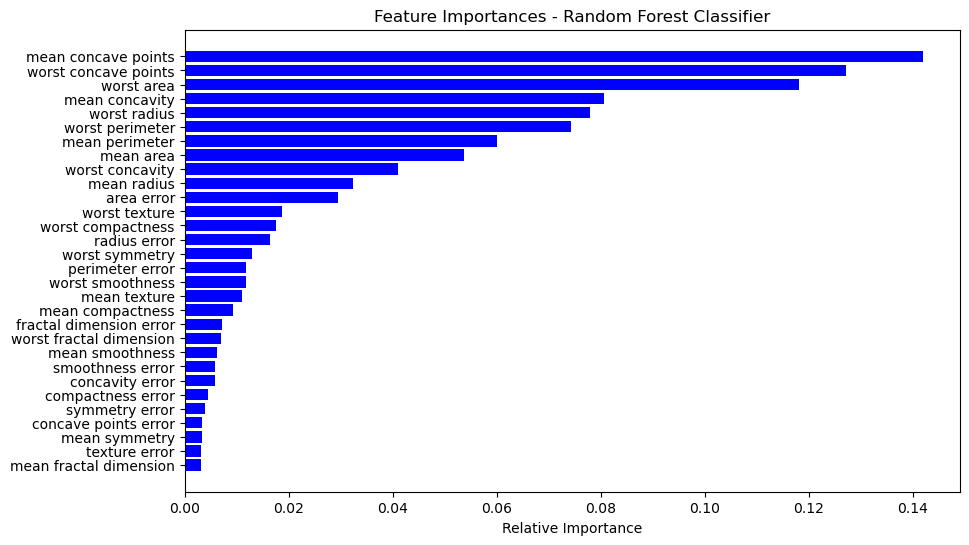

In [113]:
# Bagging Classifier
bagging_classifier = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)
print("Bagging Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))
importances_rf = rf_classifier.feature_importances_
indices_rf = np.argsort(importances_rf)
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest Classifier")
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], color='b', align='center')
plt.yticks(range(len(indices_rf)), [feature_names[i] for i in indices_rf])
plt.xlabel("Relative Importance")
plt.show()


In [115]:
# MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred_mlp = mlp_classifier.predict(X_test)
print("MLP Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

MLP Classifier:
Confusion Matrix:
 [[ 61   2]
 [  1 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



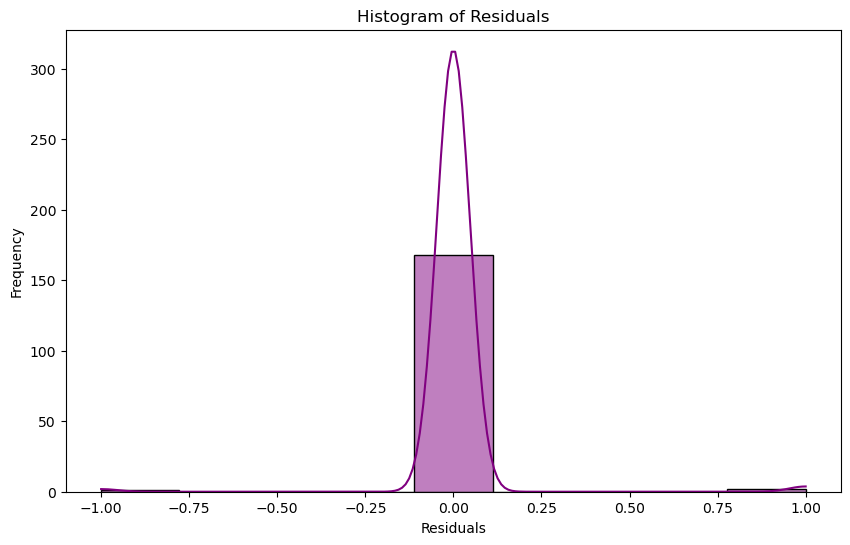

In [117]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [119]:
# ROC curves
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

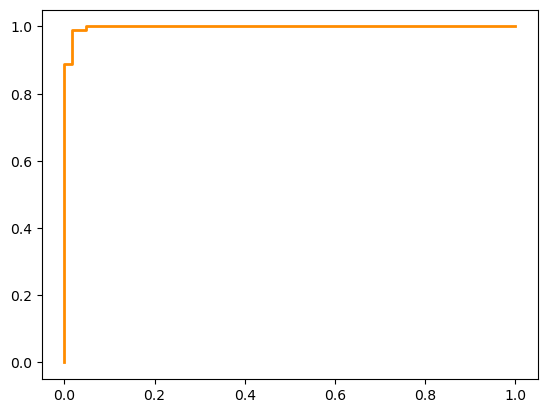

In [121]:
# ROC curve for Logistic Regression
y_pred_prob = regression.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc)

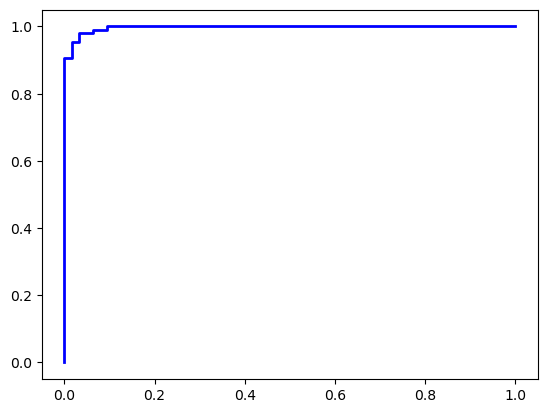

In [123]:
# ROC curve for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)

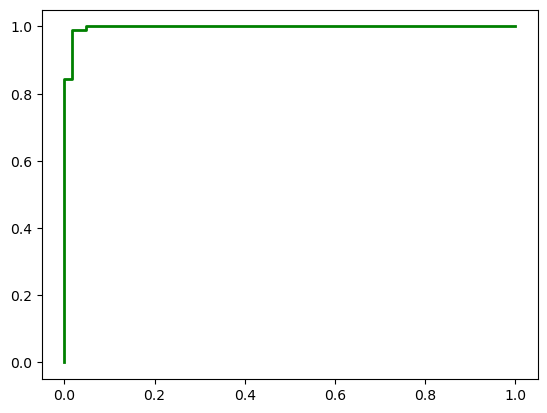

In [125]:
# ROC curve for MLP Classifier
y_pred_mlp_prob = mlp_classifier.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_mlp_prob)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label='MLP Classifier (area = %0.2f)' % roc_auc_mlp)

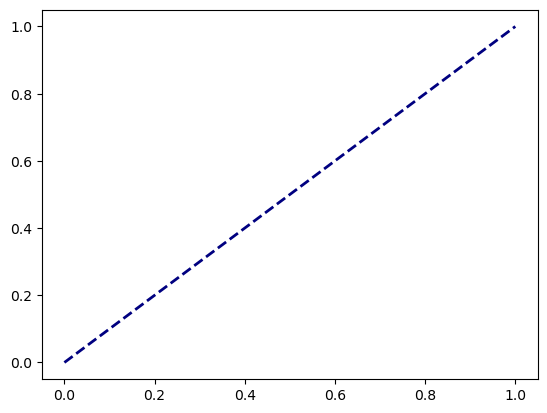

In [127]:
# Plot diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

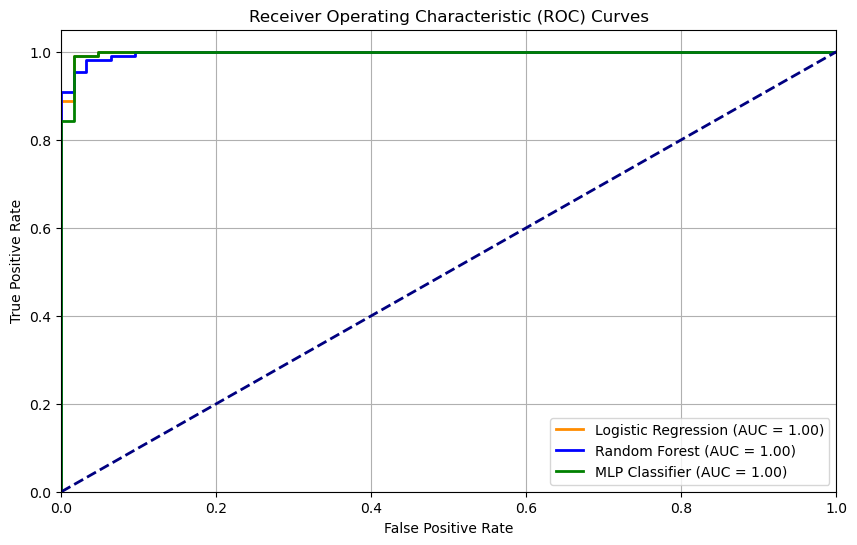

In [131]:
# Required Imports
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier

# Train the MLP Classifier (if not already trained)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_clf.fit(X_train, y_train)

# Compute predicted probabilities for all models
y_pred_prob_lr = regression.predict_proba(X_test)[:, 1]  # Logistic Regression
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]  # Random Forest
y_pred_prob_mlp = mlp_clf.predict_proba(X_test)[:, 1]  # MLP Classifier

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)  # Logistic Regression
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)  # Random Forest
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_prob_mlp)  # MLP Classifier

# Compute AUC scores
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label=f'MLP Classifier (AUC = {roc_auc_mlp:.2f})')

# Plot Diagonal Baseline (Random Guess)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Plot Settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid()
plt.show()


                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.982456   0.982584  0.982456  0.982484  0.997942
Random Forest        0.970760   0.971100  0.970760  0.970604  0.996914
MLP Classifier       0.982456   0.982469  0.982456  0.982426  0.997208


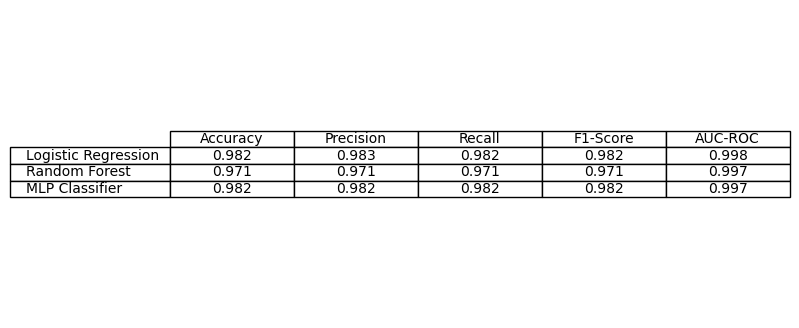

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# 1️⃣ Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# 2️⃣ Train Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# 3️⃣ Train MLP Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_clf.fit(X_train, y_train)

# Dictionary to store model results
results = {}

# Function to evaluate models
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Compute performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Compute AUC-ROC only if predict_proba is available
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class
        auc_roc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc_roc = np.nan  # Not applicable for models without probability prediction

    # Store results in dictionary
    results[name] = [accuracy, precision, recall, f1, auc_roc]

# Evaluate all models
evaluate_model("Logistic Regression", log_reg, X_test, y_test)
evaluate_model("Random Forest", rf_classifier, X_test, y_test)
evaluate_model("MLP Classifier", mlp_clf, X_test, y_test)

# Convert results to DataFrame
metrics_table = pd.DataFrame.from_dict(results, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"])

# Display the table
print(metrics_table)

# Optional: Pretty display using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=metrics_table.round(3).values, colLabels=metrics_table.columns, rowLabels=metrics_table.index, cellLoc='center', loc='center')

plt.show()


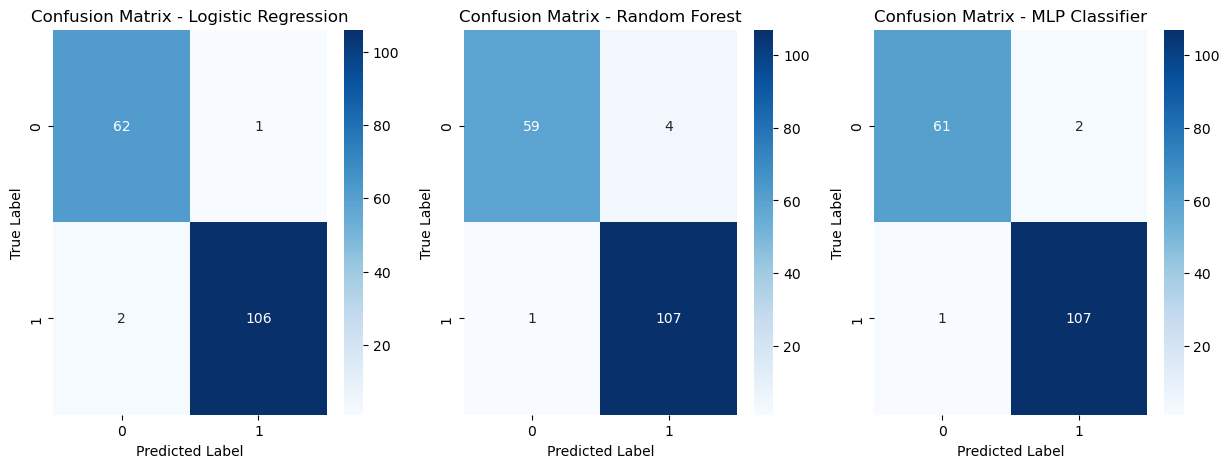

In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_classifier,
    "MLP Classifier": mlp_clf
}

plt.figure(figsize=(15, 5))
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.show()
